## **Introducing PCA with an Analogy**

Imagine you’re standing in front of a massive library filled with thousands of **books**. Each book represents a piece of **data**, and every book contains detailed information—some are about science, others about history, and some cover niche topics. The library is so vast and packed with so many books that it’s overwhelming to try and make sense of it all or even understand the general **theme** of the entire collection.

Now, imagine that instead of focusing on each individual book, someone **organizes** the library for you. They **group** books into broader **categories**—science, history, art, and so on—based on the main themes that they cover. These categories help you understand the library’s overall **structure** at a glance. The more detailed books are still there, but you don’t need to worry about them unless you want to dive deeper into a specific subject.

This is what **dimensionality reduction**—and specifically **Principal Component Analysis (PCA)**—does for **data**.

Just like how the library’s overwhelming number of books can be simplified into broader **categories**, PCA helps reduce the **complexity** of data by transforming it into **fewer, more meaningful dimensions**. These new dimensions capture the most important **patterns** in the data, allowing you to focus on what truly matters. The finer, more granular details are still there, but they are less emphasized in the new, simplified version of the data.

PCA makes it easier to understand and **visualize** complex datasets, just as grouping books by their main themes helps you navigate the library more efficiently. By reducing the clutter, you can quickly identify key **insights** and patterns that might otherwise be hidden. In the world of data, this leads to clearer analysis, more actionable insights, and improved **decision-making**.

Through this lab, we’ll explore how PCA works to condense complex, high-dimensional data into something more manageable, allowing us to focus on the most relevant and important features for analysis and machine learning.

---


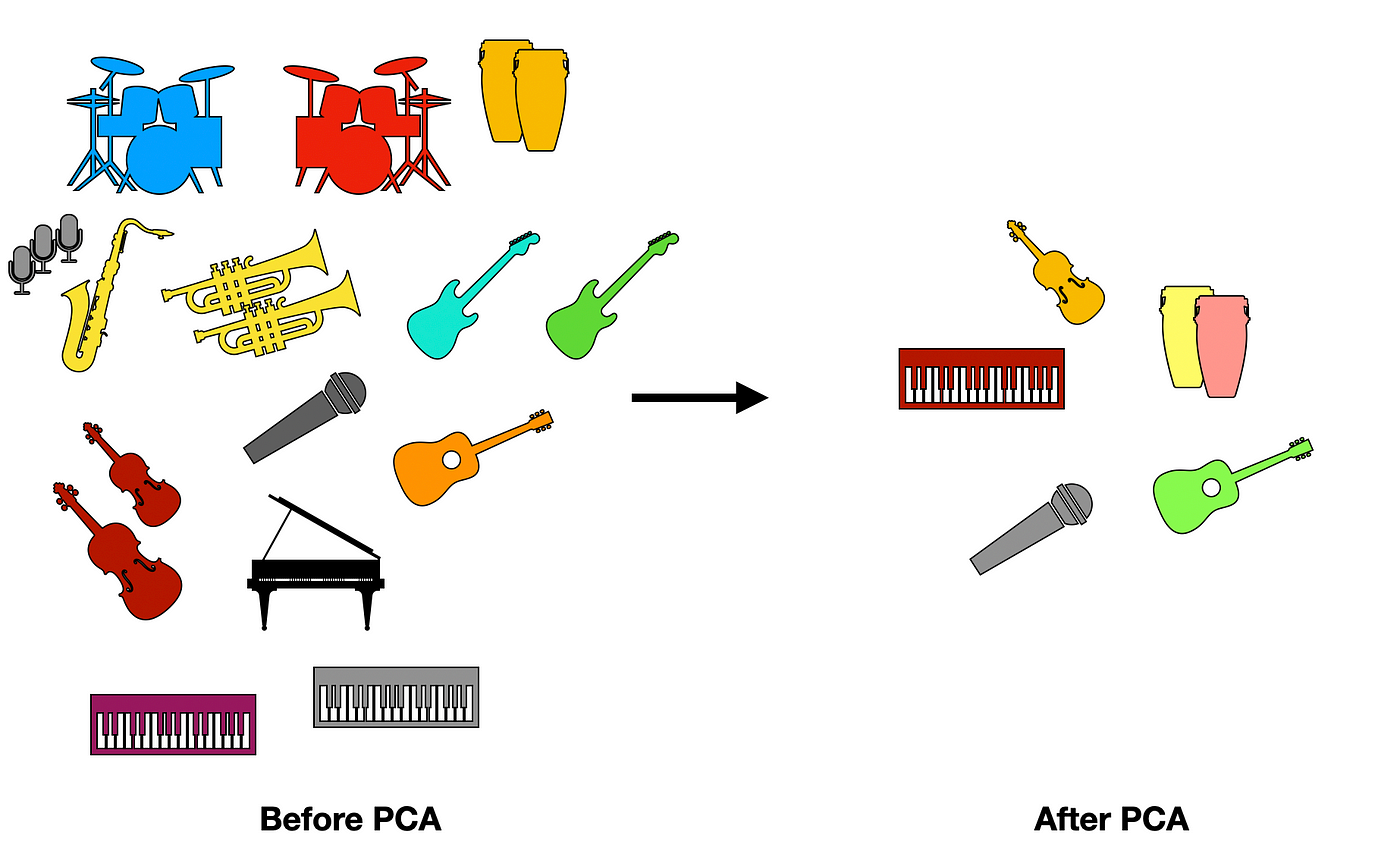

### **Intuitive Example:**
If we have data points representing height and weight, the first principal component might capture the overall trend where taller people tend to weigh more. The second principal component might capture a smaller but still meaningful pattern in the data, such as a slight spread or variation in weight that doesn't follow the same exact trend as height. As we continue to add more principal components, each one captures even less variation, but together they provide a fuller understanding of how the data is spread out in space.

### **How PCA Works:**
When the data points follow a diagonal pattern, this indicates a relationship between features (in this case height and weight). Instead of analyzing the data along the original height and weight axes, PCA helps us find a new axis (called the first principal component) that best captures the overall pattern of the data.
The second principal component, while still important, captures less variation than the first. It finds the next best direction that explains the spread in the data, but this direction is orthogonal (perpendicular) to the first component. After the second component, the third principal component captures even less variation, and so on.

### **Why this matters:**
By focusing only on the first few principal components, we can simplify the data without losing much important information. In our example, instead of looking at both height and weight separately, PCA helps us combine them into a single line (the first principal component) that explains most of the data’s trend, making it easier to analyze and understand.

Now enough talking lets get hands wet with code!



### **1. Importing Libraries and Loading the Dataset**
This code will import necessary libraries and load a sample dataset (e.g., the Breast Cancer dataset).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df['target'] = df['target'].map({0: 'Benign', 1: 'Malignant'})

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


### **2. Data Normalization**

When working with **Principal Component Analysis (PCA)**, it’s important to **normalize** the data before applying PCA. Here's why:

- **PCA is sensitive to the scale of the data**: PCA works by identifying directions (principal components) that explain the most variance in the dataset. If your data has features with different scales (e.g., one feature measured in hundreds and another in decimals), PCA might give more importance to features with larger scales, even if they are less relevant to the overall analysis.
  
- **Normalization makes all features comparable**: By standardizing the data, we ensure that each feature contributes equally to the PCA analysis. Normalization ensures that all features have a **mean of 0** and a **standard deviation of 1**, making them **comparable** regardless of their original units.

- **Increases the accuracy of PCA**: Normalizing the data helps PCA focus on the **patterns and relationships** in the data, rather than being dominated by the differences in feature scales. This leads to a more accurate and meaningful transformation into principal components.




In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the mean and standard deviation after scaling
print(f"Mean of the scaled data: {np.mean(X_scaled, axis=0)}")
print(f"Standard deviation of the scaled data: {np.std(X_scaled, axis=0)}")


Mean of the scaled data: [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
Standard deviation of the scaled data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


###**3. Applying PCA**

In [ ]:
# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert the PCA results into a DataFrame for easier visualization
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])


pca_df.head()


,Principal Component 1,Principal Component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]



- **Principal Component 1** explains **44.27%** of the total variance in the dataset.
- **Principal Component 2** explains **18.97%** of the total variance.

Together, these two principal components explain about **63.24%** of the variance in the original data. This means that by reducing the data to just two components, we are able to capture over 60% of the important information from the original features, significantly simplifying the data while retaining key patterns.

This level of explained variance indicates that PCA has done a good job in reducing the complexity of the data from 31 to just 2 without losing too much information.


### **4. PCA Applications?**

#### *1. Data Visualization*
- When dealing with datasets that have many features (more than 3), it can be difficult to visualize the data in a way that makes sense. **PCA** helps by reducing the number of dimensions in the data, making it possible to view and interpret the data in just **2D or 3D**.
- By transforming high-dimensional data into two or three principal components, PCA allows you to visualize the data in a much simpler form, highlighting key patterns, clusters, and outliers that might otherwise be hidden.
  





We added the target labels (`y`) to the PCA DataFrame to differentiate between the two classes (Benign and Malignant) in the visualization.


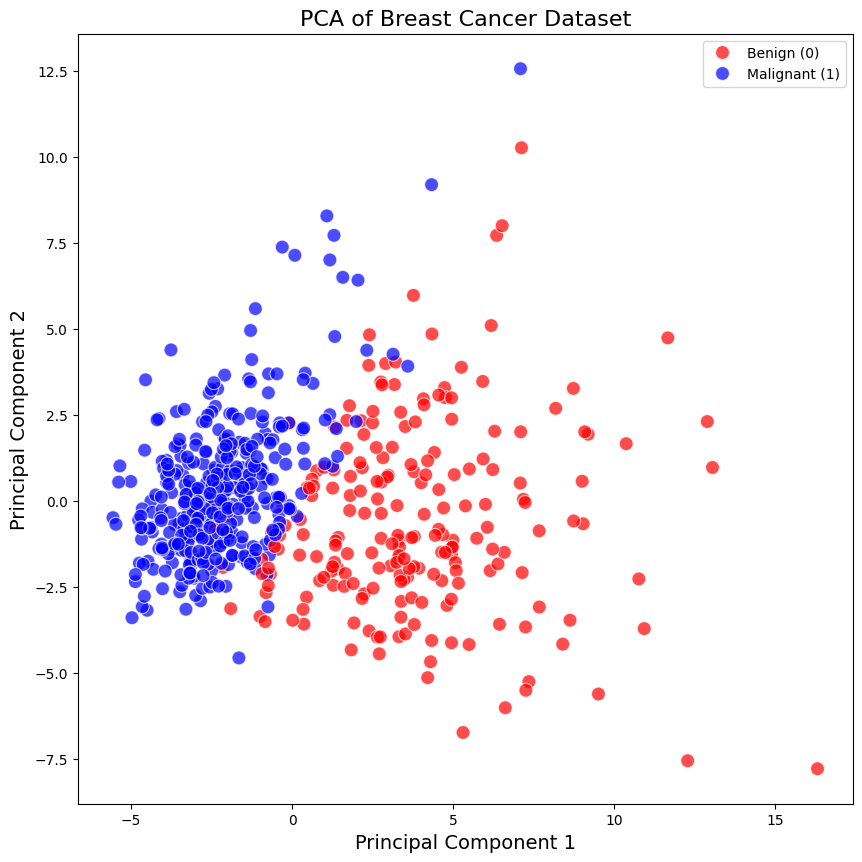

In [ ]:
# Add the target labels to the DataFrame
pca_df['target'] = y

# Create a scatter plot to visualize the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2',
                hue='target', palette={0: 'r', 1: 'b'}, s=100, alpha=0.7)

# Add plot labels and title
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA of Breast Cancer Dataset', fontsize=16)

# Modify legend to manually set the correct colors
handles, labels = plt.gca().get_legend_handles_labels()


# Set the legend to display 'Benign' and 'Malignant'
plt.legend(handles=handles, labels=['Benign (0)', 'Malignant (1)'], loc='upper right')

# Show the plot
plt.show()


*In This Example*:

We had 31 features, but PCA reduces it to just two principal components, which we could easily on a 2D graph as shown above, making it easier to analyze and interpret visually.


We sucessfully applied PCA and examined its power!

### **How PCA helped?**
If you didn't apply PCA and simply visualized the original high-dimensional data, it would be impossible to plot directly in 2D because the data has many more dimensions (e.g., 30 features in the case of the Breast Cancer dataset). To give you a better sense of how the data might look without reducing it to two principal components, here’s a code snippet that creates a pairplot of the original features to visualize the relationships between all pairs of features.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cancer_df' is the DataFrame with the original features and target labels
sns.pairplot(df, hue="target", markers=["o", "s"], diag_kind="kde", plot_kws={'s': 50})
plt.suptitle("Pairplot of Breast Cancer Dataset Features", fontsize=20)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

Using **PCA** provided a clearer 2D or 3D representation of the data. This allows for better separation between the classes, making it easier to visualize and interpret the results. Without PCA, relying on methods like pair plots or heatmaps may not offer the same level of clarity, especially when the data is complex and high-dimensional.

Hoooryayyy Now we succesfully covered and applied and grasped the power of PCA!!

#### *2. Improving Machine Learning (ML) Speed*
- In machine learning, especially with large datasets, training models can be **time-consuming** if there are many features to process. **PCA** can help speed up this process by reducing the number of features in the dataset. This makes it easier and faster for the model to learn from the data.
- **By using fewer, but more meaningful features (the principal components)**, machine learning models can be trained more quickly, allowing for faster insights and decisions.

**Example**: Suppose you're working with a dataset of 1,000 features. PCA could reduce it to just 20 components, making the training of a machine learning model much faster while still retaining the essential information.

#### **In Simple Terms, PCA Helps You...**
- Take a complex dataset with many features and **reduce it to just the most important parts**. This makes it easier to work with, understand, and analyze, allowing for faster model training and clearer visualizations.

Lets see How this happens in a real application

### Objective

We aim to demonstrate how **PCA** can significantly **speed up the training process** while maintaining model **accuracy** on the **MNIST dataset**. We will compare training times and performance for a **Neural Network** model with and without PCA applied to reduce the dataset's dimensionality.


In [ ]:
import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X = mnist.data
y = mnist.target.astype(int)

# Print number of columns (features) for MNIST dataset
print(f"Number of columns (features) in MNIST dataset: {X.shape[1]}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model without PCA ---
start_time_no_pca = time.time()

# Train a Neural Network model without PCA
nn_no_pca = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)
nn_no_pca.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_no_pca = nn_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

end_time_no_pca = time.time()
time_no_pca = end_time_no_pca - start_time_no_pca

# --- Model with PCA (Capturing 90% of the variance) ---
start_time_with_pca = time.time()

# Apply PCA and capture 90% of the variance
pca = PCA(n_components=0.90)  # Set the variance to 90%
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Neural Network model on the transformed data
nn_with_pca = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)
nn_with_pca.fit(X_train_pca, y_train)

# Make predictions and evaluate the model
y_pred_with_pca = nn_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

end_time_with_pca = time.time()
time_with_pca = end_time_with_pca - start_time_with_pca

# Results
print(f'Accuracy without PCA: {accuracy_no_pca:.4f}')
print(f'Training time without PCA: {time_no_pca:.4f} seconds\n')

print(f'Accuracy with PCA (90% variance): {accuracy_with_pca:.4f}')
print(f'Training time with PCA (90% variance): {time_with_pca:.4f} seconds')




Number of columns (features) in MNIST dataset: 784


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy without PCA: 0.9661
Training time without PCA: 23.5007 seconds

Accuracy with PCA (90% variance): 0.9639
Training time with PCA (90% variance): 7.2341 seconds
Number of components to explain 90% variance: 235


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### Conclusion

Applying **PCA** to the **MNIST dataset** reduced the number of features from 784 to retain 90% of the variance, resulting in:

- **Accuracy**: The model's accuracy remained nearly the same (**0.9639 with PCA** vs **0.9661 without PCA**), demonstrating PCA's ability to retain important information.
- **Training Time**: Training was **much faster** with PCA, reducing time from **23.5 seconds** to **7.2 seconds**, showcasing PCA's efficiency in high-dimensional data.

### Key Takeaway:
PCA allows for **faster training** and **retains performance**, making it an essential technique for large datasets.


Hope you enjoyed the Tutorial. Thanks for listening and learning Happy coding!!!
